# Car Crash in Brazil

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
crash=pd.read_csv("accidents_2017_to_2023_english.csv")
crash

,inverse_data,week_day,hour,state,road_id,km,city,cause_of_accident,type_of_accident,victims_condition,...,slightly_injured,severely_injured,uninjured,ignored,total_injured,vehicles_involved,latitude,longitude,regional,police_station
0,2017-01-01,sunday,01:45:00,RS,116.0,"34,9",VACARIA,Mechanical loss/defect of vehicle,Rear-end collision,With injured victims,...,4,0,2,0,4,2,-28.507120,-50.94118,SPRF-RS,DEL05-RS
1,2017-01-01,sunday,01:00:00,PR,376.0,636,TIJUCAS DO SUL,Incompatible velocity,Run-off-road,With dead victims,...,0,0,1,0,0,2,-25.754000,-49.12660,SPRF-PR,DEL01-PR
2,2017-01-01,sunday,04:40:00,BA,101.0,65,ENTRE RIOS,Driver was sleeping,Head-on collision,With dead victims,...,1,1,2,0,2,2,-11.961800,-38.09530,SPRF-BA,DEL01-BA
3,2017-01-01,sunday,06:30:00,PA,316.0,"72,5",CASTANHAL,Driver's lack of attention to conveyance,Side impact collision,With dead victims,...,0,0,3,0,0,3,-1.289980,-47.83483,SPRF-PA,DEL01-PA
4,2017-01-01,sunday,09:00:00,GO,20.0,"220,5",POSSE,Road's defect,Collision with fixed object,With injured victims,...,2,1,0,0,3,1,-14.142210,-46.32259,SPRF-DF,DEL02-DF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463147,2023-02-09,thursday,05:10:00,PR,116.0,"89,5",PIRAQUARA,Driver's lack of reaction,Collision with object,With injured victims,...,2,0,0,0,2,1,-25.454290,-49.08817,SPRF-PR,DEL01-PR
463148,2023-06-28,wednesday,19:48:00,ES,101.0,271,SERRA,Acessing the road without seeing the presence ...,Broadside collision,With injured victims,...,0,1,1,0,1,2,-20.232670,-40.27658,SPRF-ES,DEL02-ES
463149,2023-07-27,thursday,05:20:00,PI,343.0,478,ANGICAL DO PIAUI,Animals on the road,Animal collision,With injured victims,...,0,1,0,0,1,1,-6.152664,-42.71252,SPRF-PI,DEL01-PI
463150,2023-05-13,saturday,09:10:00,RJ,116.0,173,SAO JOAO DE MERITI,Pedestrian was walking in the road,Fall of vehicle occupant,With injured victims,...,2,0,1,0,2,3,-22.798100,-43.35727,SPRF-RJ,DEL01-RJ


In [3]:
crash.columns

Index(['inverse_data', 'week_day', 'hour', 'state', 'road_id', 'km', 'city',
       'cause_of_accident', 'type_of_accident', 'victims_condition',
       'weather_timestamp', 'road_direction', 'wheather_condition',
       'road_type', 'road_delineation', 'people', 'deaths', 'slightly_injured',
       'severely_injured', 'uninjured', 'ignored', 'total_injured',
       'vehicles_involved', 'latitude', 'longitude', 'regional',
       'police_station'],
      dtype='object')

## Removing columns

In [4]:
A=crash.drop(["hour","road_id","cause_of_accident","slightly_injured","severely_injured","uninjured","ignored",'latitude', 'longitude', 'regional',
       'police_station','km','victims_condition','road_direction','city'],axis=1)

In [5]:
A

,inverse_data,week_day,state,type_of_accident,weather_timestamp,wheather_condition,road_type,road_delineation,people,deaths,total_injured,vehicles_involved
0,2017-01-01,sunday,RS,Rear-end collision,Night,Clear sky,Simple,Straight,6,0,4,2
1,2017-01-01,sunday,PR,Run-off-road,Night,Drizzle,Double,Curve,2,1,0,2
2,2017-01-01,sunday,BA,Head-on collision,Sunrise,Cloudy,Simple,Curve,5,1,2,2
3,2017-01-01,sunday,PA,Side impact collision,Sunrise,Clear sky,Simple,Straight,4,1,0,3
4,2017-01-01,sunday,GO,Collision with fixed object,Day,Clear sky,Simple,Temporary Detour,3,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
463147,2023-02-09,thursday,PR,Collision with object,Night,Clear sky,Double,Straight,2,0,2,1
463148,2023-06-28,wednesday,ES,Broadside collision,Night,Clear sky,Double,Straight,2,0,1,2
463149,2023-07-27,thursday,PI,Animal collision,Night,Clear sky,Simple,Curve,1,0,1,1
463150,2023-05-13,saturday,RJ,Fall of vehicle occupant,Day,Clear sky,Double,Straight,3,0,2,3


### Checking null values

In [6]:
A.isnull().sum()

inverse_data          0
week_day              0
state                 0
type_of_accident      0
weather_timestamp     0
wheather_condition    0
road_type             0
road_delineation      0
people                0
deaths                0
total_injured         0
vehicles_involved     0
dtype: int64

In [7]:
A.dtypes

inverse_data          object
week_day              object
state                 object
type_of_accident      object
weather_timestamp     object
wheather_condition    object
road_type             object
road_delineation      object
people                 int64
deaths                 int64
total_injured          int64
vehicles_involved      int64
dtype: object

## Renaming the columns

In [40]:
A=A.rename(columns={"inverse_data":"date","total_injured":"injured","week_day":"weekday","wheather_condition":"weather_condition"})

In [41]:
A

,date,weekday,state,type_of_accident,weather_timestamp,weather_condition,road_type,road_delineation,people,deaths,injured,vehicles_involved,year
0,2017-01-01,sunday,RS,Rear-end collision,Night,Clear sky,Simple,Straight,6,0,4,2,2017
1,2017-01-01,sunday,PR,Run-off-road,Night,Drizzle,Double,Curve,2,1,0,2,2017
2,2017-01-01,sunday,BA,Head-on collision,Sunrise,Cloudy,Simple,Curve,5,1,2,2,2017
3,2017-01-01,sunday,PA,Side impact collision,Sunrise,Clear sky,Simple,Straight,4,1,0,3,2017
4,2017-01-01,sunday,GO,Collision with fixed object,Day,Clear sky,Simple,Temporary Detour,3,0,3,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
463147,2023-02-09,thursday,PR,Collision with object,Night,Clear sky,Double,Straight,2,0,2,1,2023
463148,2023-06-28,wednesday,ES,Broadside collision,Night,Clear sky,Double,Straight,2,0,1,2,2023
463149,2023-07-27,thursday,PI,Animal collision,Night,Clear sky,Simple,Curve,1,0,1,1,2023
463150,2023-05-13,saturday,RJ,Fall of vehicle occupant,Day,Clear sky,Double,Straight,3,0,2,3,2023


## object to Date format  & Filtering year

In [42]:
A["date"]=pd.to_datetime(A["date"])

In [43]:
A['year'] = A['date'].dt.year

In [44]:
A.drop("date",axis=1)

,weekday,state,type_of_accident,weather_timestamp,weather_condition,road_type,road_delineation,people,deaths,injured,vehicles_involved,year
0,sunday,RS,Rear-end collision,Night,Clear sky,Simple,Straight,6,0,4,2,2017
1,sunday,PR,Run-off-road,Night,Drizzle,Double,Curve,2,1,0,2,2017
2,sunday,BA,Head-on collision,Sunrise,Cloudy,Simple,Curve,5,1,2,2,2017
3,sunday,PA,Side impact collision,Sunrise,Clear sky,Simple,Straight,4,1,0,3,2017
4,sunday,GO,Collision with fixed object,Day,Clear sky,Simple,Temporary Detour,3,0,3,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
463147,thursday,PR,Collision with object,Night,Clear sky,Double,Straight,2,0,2,1,2023
463148,wednesday,ES,Broadside collision,Night,Clear sky,Double,Straight,2,0,1,2,2023
463149,thursday,PI,Animal collision,Night,Clear sky,Simple,Curve,1,0,1,1,2023
463150,saturday,RJ,Fall of vehicle occupant,Day,Clear sky,Double,Straight,3,0,2,3,2023


In [45]:
A.dtypes

date                 datetime64[ns]
weekday                      object
state                        object
type_of_accident             object
weather_timestamp            object
weather_condition            object
road_type                    object
road_delineation             object
people                        int64
deaths                        int64
injured                       int64
vehicles_involved             int64
year                          int32
dtype: object

- For accident data, outliers are common in:

- people → group transport crashes

- injured or deaths → high-fatality events

- vehicles_involved → pile-ups, multi-car collisions

<Axes: >

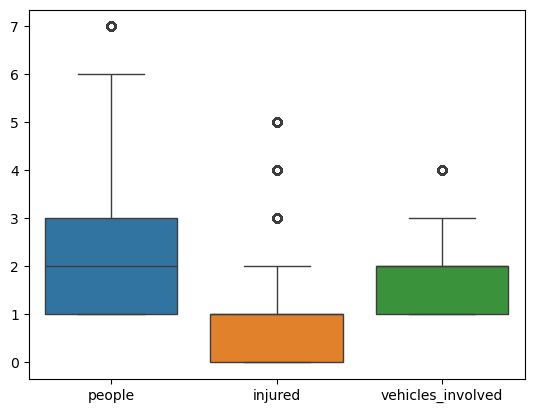

In [46]:
sns.boxplot(data=A[["people","injured","vehicles_involved"]])

## Filtring Outliers

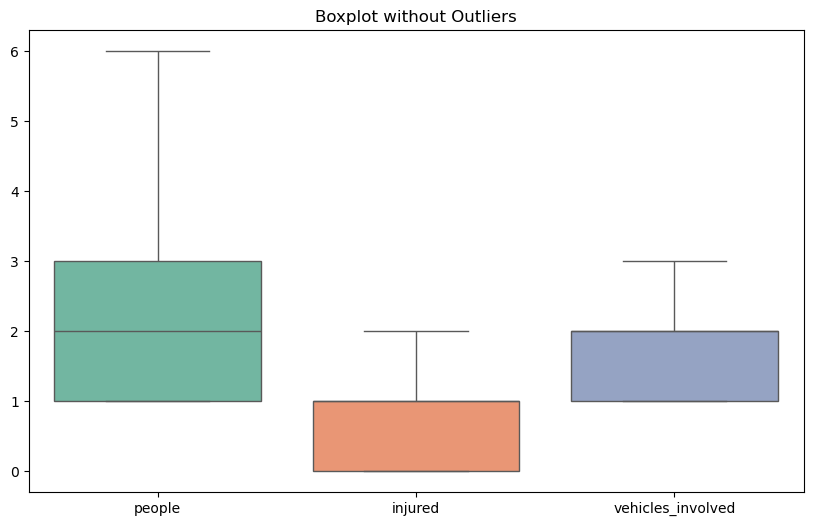

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=A[["people", "injured", "vehicles_involved"]], showfliers=False, palette='Set2')
plt.title("Boxplot without Outliers")
plt.show()


## Removing outliers

In [16]:
print(A["people"].quantile(0.80))
print(A["people"].quantile(0.90))
print(A["people"].quantile(0.99))
print(A["people"].quantile(1.00))

3.0
4.0
8.0
80.0


In [17]:
print(A["injured"].quantile(0.80))
print(A["injured"].quantile(0.90))
print(A["injured"].quantile(0.99))
print(A["injured"].quantile(1.00))

2.0
2.0
5.0
66.0


In [18]:
print(A["vehicles_involved"].quantile(0.80))
print(A["vehicles_involved"].quantile(0.90))
print(A["vehicles_involved"].quantile(0.99))
print(A["vehicles_involved"].quantile(1.00))

2.0
2.0
4.0
23.0


In [19]:
A=A[A['people']<8]

In [20]:
A=A[A['injured']<6]

In [21]:
A=A[A['vehicles_involved']<5]

<Axes: >

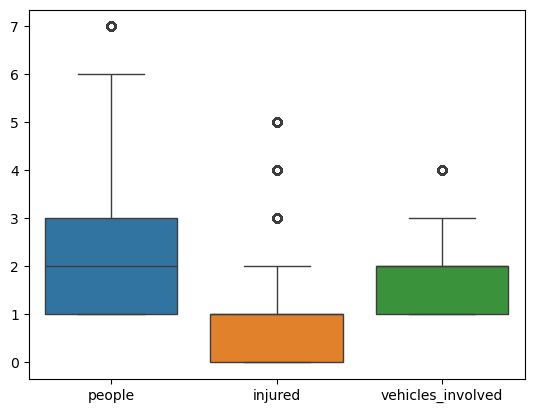

In [22]:
sns.boxplot(data=A[["people","injured","vehicles_involved"]])

## Checking Unique values

In [47]:
A['weather_condition'].unique()

array(['Clear sky', 'Drizzle', 'Cloudy', 'Sunny', 'Rainy', 'Fog',
       'Ignored', 'Windy', 'Hail', 'Snowy'], dtype=object)

In [24]:
A['road_type'].unique()

array(['Simple', 'Double', 'Multiple'], dtype=object)

In [25]:
A['road_delineation'].value_counts()

road_delineation
Straight             274013
Curve                 72355
Not Reported          57264
Intersection          19539
Temporary Detour      11931
Roundabout             8925
Authorized U-turn      5130
Overpass               3096
Bridge                 2337
Tunnel                  521
Name: count, dtype: int64

In [26]:
A['weather_timestamp'].value_counts()

weather_timestamp
Day        248426
Night      159273
Sunset      25040
Sunrise     22372
Name: count, dtype: int64

In [27]:
A['type_of_accident'].value_counts()

type_of_accident
Rear-end collision                     84447
Run-off-road                           74947
Broadside collision                    56390
Overturn                               36603
Side impact collision                  34856
Head-on collision                      28735
Collision with fixed object            21600
Pedestrian collision                   21214
Fall of vehicle occupant               20107
Rollover                               16725
Side collision (same direction)        16123
Collision with object                  12826
Animal collision                        8363
Vehicle fire                            7595
Chain reaction crash (pile-up)          5288
Side collision (opposite direction)     4565
Collision with moving object            1572
Cargo spill                             1332
Minor incidental damage                  999
Unusual events                           784
Not informed                              40
Name: count, dtype: int64

## Data visualization

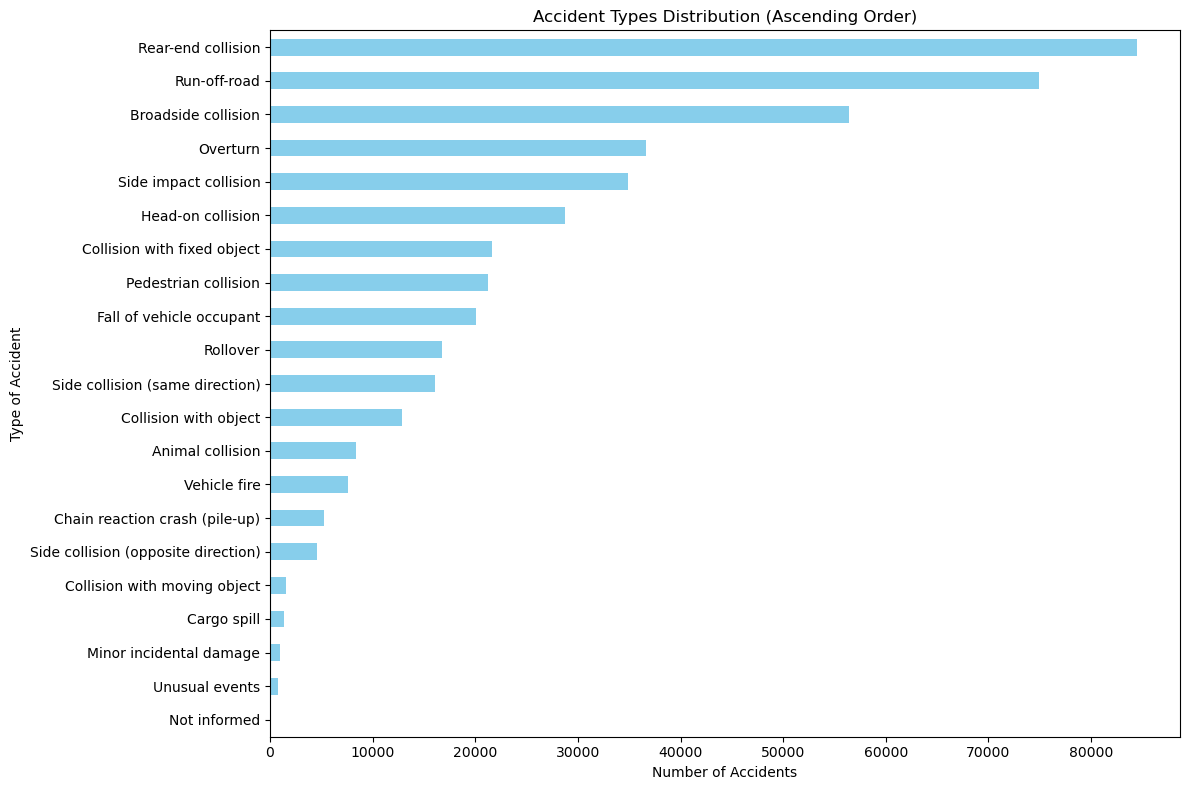

In [29]:
# Count and sort accident types in ascending order
accident_counts = A['type_of_accident'].value_counts().sort_values(ascending=True)

# Plot sorted bar chart
plt.figure(figsize=(12,8))
accident_counts.plot(kind='barh', color='skyblue')
plt.title('Accident Types Distribution (Ascending Order)')
plt.xlabel('Number of Accidents')
plt.ylabel('Type of Accident')
plt.tight_layout()
plt.show()


- Explanation: The most frequent accident types are often indicative of common driving issues, such as rear-end collisions and run-off-road accidents. Understanding which accidents occur more often can help in targeting safety measures.

- Insight: "Rear-end collisions" are the most common, this could imply issues like tailgating, distracted driving, or frequent stop-and-go traffic. These types of accidents often occur in urban settings or on highways.

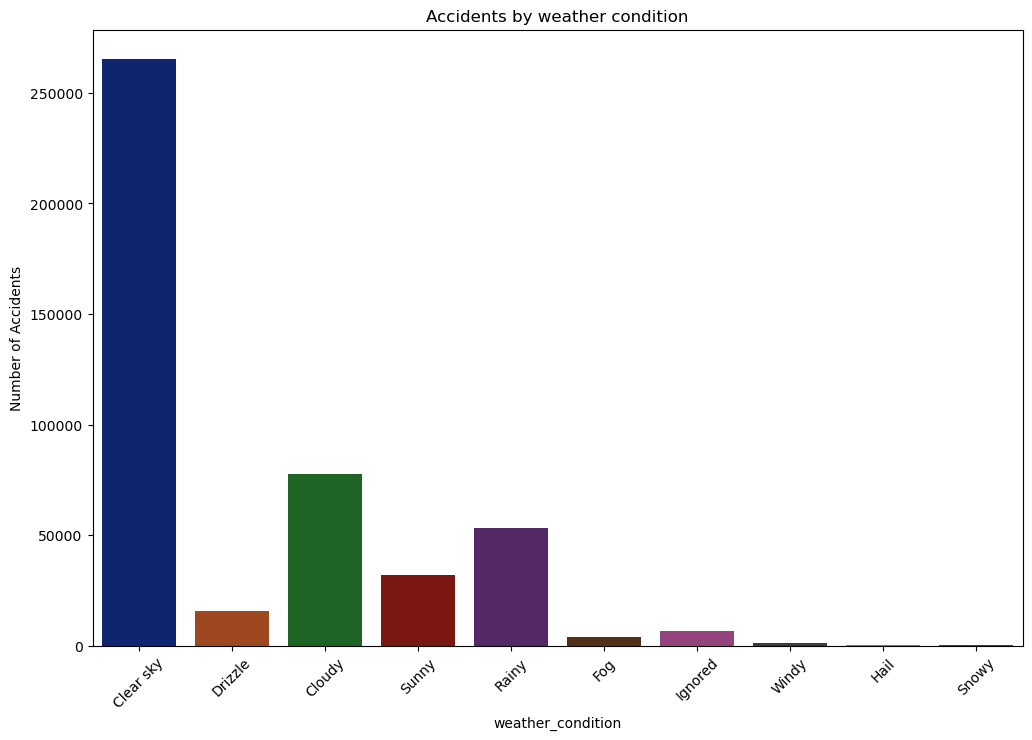

In [52]:
plt.figure(figsize=(12,8))
sns.countplot(data=A, x='weather_condition', palette='dark')
plt.title('Accidents by weather condition')
plt.xlabel('weather_condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


#### Insight: Correlation Between Weather and Accidents

- Explanation: Weather conditions play a significant role in accident occurrences. For example, accidents in "Rainy" weather might have higher injury rates due to slippery roads.

- Insight Example: If "Rainy" weather leads to a higher number of accidents compared to "Clear sky," it could imply the need for better road drainage or weather-specific road signs.

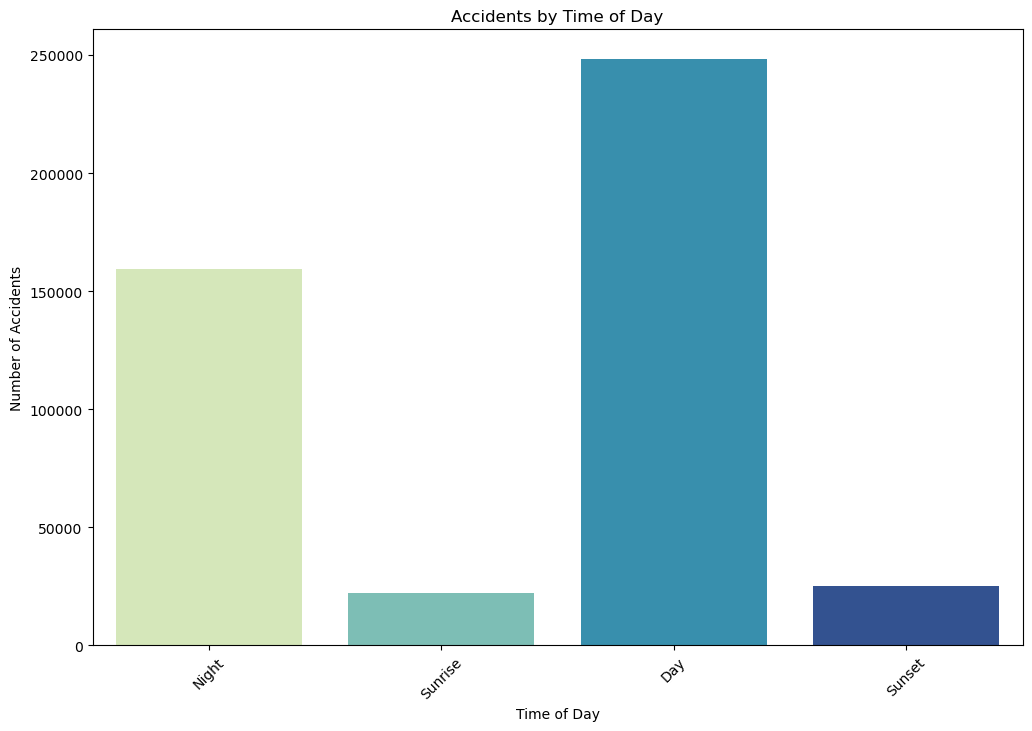

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(data=A, x='weather_timestamp', palette='YlGnBu')
plt.title('Accidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


#### Insight: Time of Day Impact on Accidents

- Explanation: The time of day affects accident frequency, with peak traffic times likely to lead to more accidents. It's also essential to see if accidents increase during specific times like sunrise or sunset due to visibility issues.

- Insight Example: "Night" or "Sunset" accidents may be more severe because of reduced visibility. This insight can drive safety campaigns, like more reflective road markings during those times.

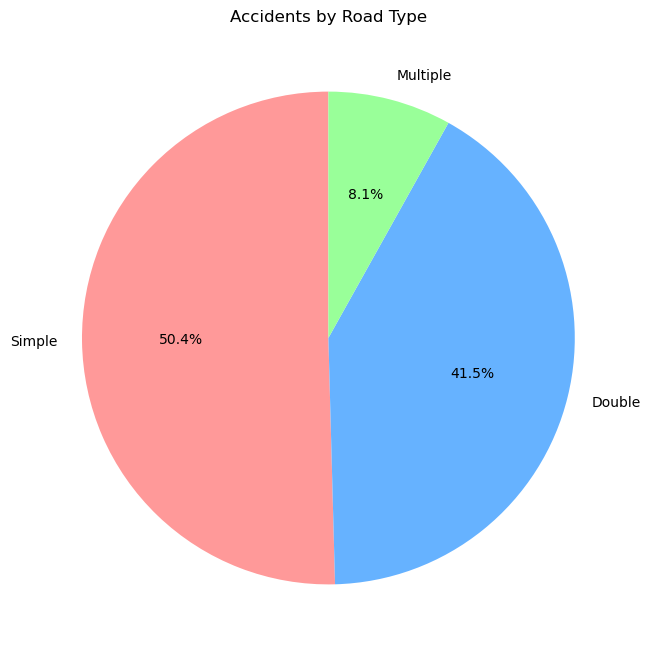

In [32]:
road_type_counts = A['road_type'].value_counts()

# Plot Pie chart for Road Type Distribution
plt.figure(figsize=(8,8))
road_type_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#FF9999','#66B2FF','#99FF99'])
plt.title('Accidents by Road Type')
plt.ylabel('')
plt.show()


#### Insight: Road Type and Accident Frequency

- Explanation: Accident frequency could differ based on the road type. For example, accidents may be more frequent on "Curves" or "Intersections" than on "Straight" roads due to complexity or reduced visibility.

- Insight Example: A high frequency of accidents on "Curves" may indicate the need for improved road signage or reduced speed limits on those sections.

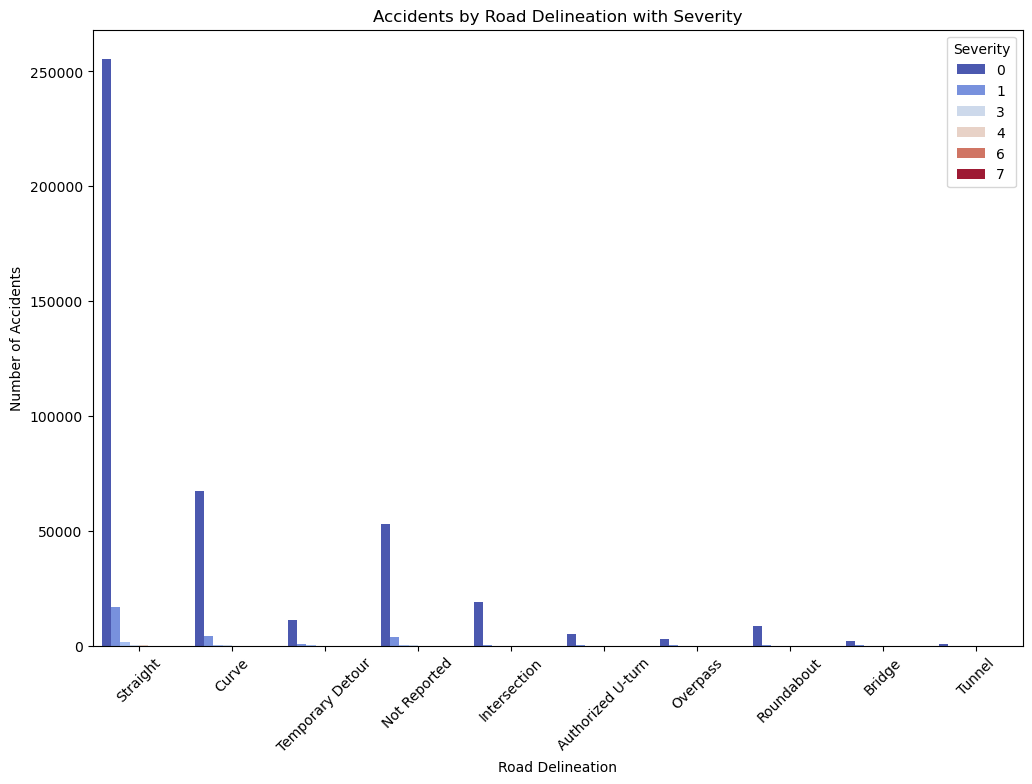

In [33]:
plt.figure(figsize=(12,8))
sns.countplot(data=A, x='road_delineation', hue='deaths', palette='coolwarm')
plt.title('Accidents by Road Delineation with Severity')
plt.xlabel('Road Delineation')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Severity', loc='upper right')
plt.show()

#### Insight: Severity of Accidents Based on Road Delineation

- Explanation: Accidents can be more severe depending on the road configuration. Curved roads or intersections could be more prone to high-severity accidents compared to straight roads.

- Insight Example: Road delineations like "Curves" might result in higher fatalities or injuries, suggesting a need for better road design or speed limit enforcement on curves.

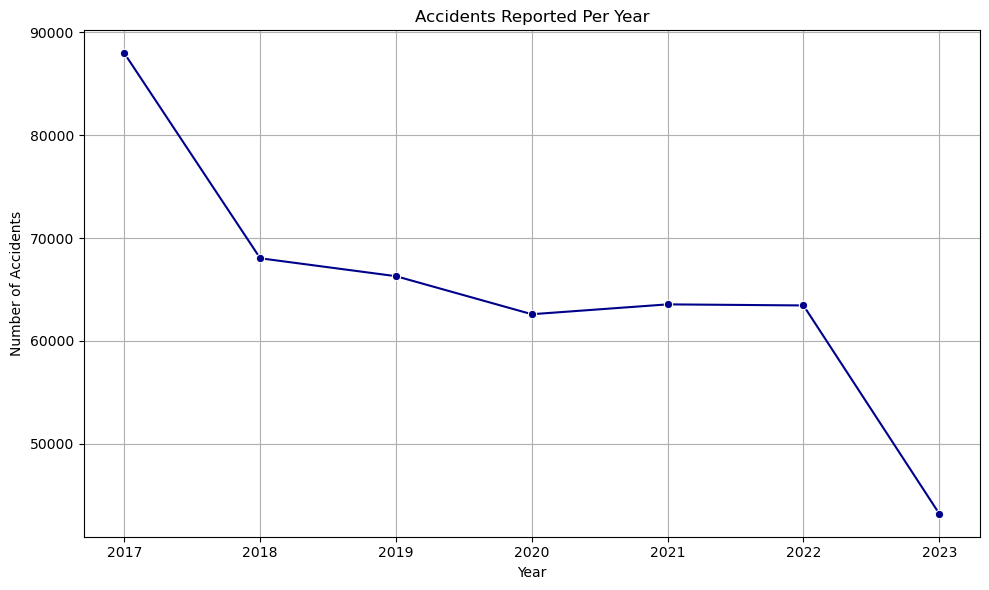

In [34]:
# Count accidents per year
s = A['year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(x=s.index, y=s.values, marker='o', color='darkblue')
plt.title('Accidents Reported Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Insight: Frequency of Accidents Over Time (Line Plot)

- Explanation: Analyzing accidents over time can provide insights into trends. Are accidents increasing year by year? Is there any particular season with a higher frequency of accidents?

- Insight Example: A spike in accidents during certain months or years might indicate seasonality or issues related to road maintenance or safety during specific periods.

In [35]:
state_deaths = A.groupby('state')['deaths'].sum().sort_values(ascending=False).head(10)
state_deaths

state
MG    4294
PR    3371
BA    3124
SC    2375
PE    1997
RS    1972
RJ    1936
GO    1769
MT    1447
SP    1420
Name: deaths, dtype: int64

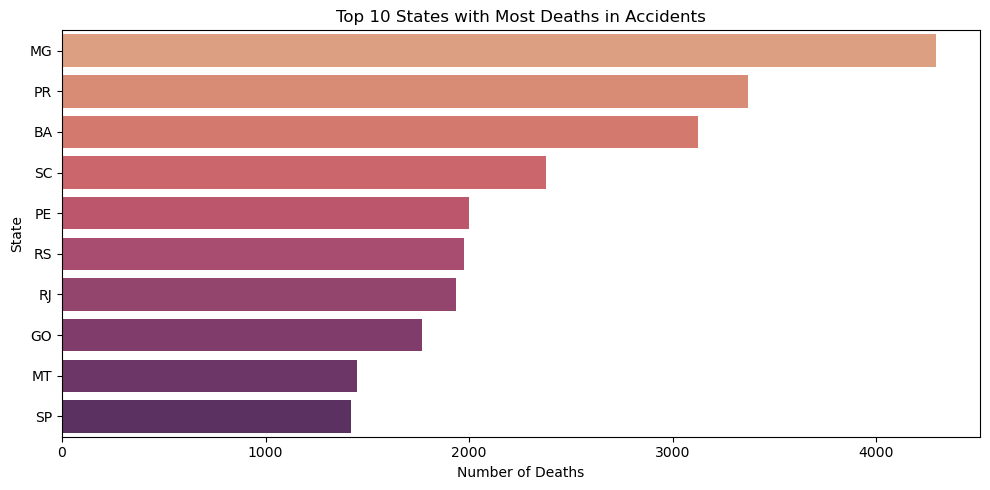

In [36]:
state_deaths = A.groupby('state')['deaths'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=state_deaths.values, y=state_deaths.index, palette='flare')
plt.title('Top 10 States with Most Deaths in Accidents')
plt.xlabel('Number of Deaths')
plt.ylabel('State')
plt.tight_layout()
plt.show()


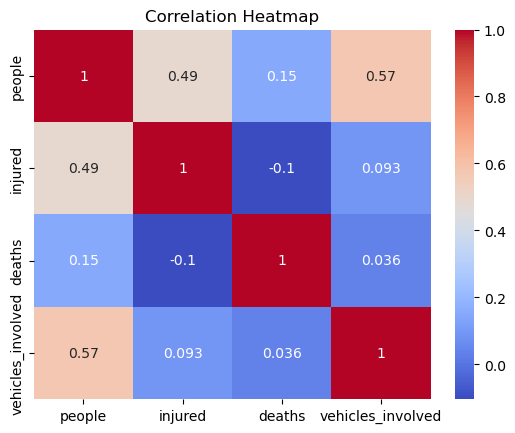

In [39]:
# Heatmap for correlation
corr = A[["people", "injured", "deaths", "vehicles_involved"]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Hypothesis Test

### Hypothesis Test 1: Are accidents more severe at night than during the day?
🔹 What:

Test whether injuries during nighttime accidents are significantly higher than daytime accidents.

🔹 Why:

If nighttime accidents are more severe, this can guide policy changes (like improved lighting, night patrols, or speed regulation).

🔹 Which Test:

Independent Samples t-test (two groups: day vs night)

### Hypothesis:

- Null (H₀): Mean injuries during day = night

- Alternate (H₁): Mean injuries during night > day

In [37]:
from scipy.stats import ttest_ind

# Filter groups
day_injuries = A[A['weather_timestamp'] == 'Day']['injured']
night_injuries = A[A['weather_timestamp'] == 'Night']['injured']

# Perform t-test
t_stat, p_val = ttest_ind(night_injuries, day_injuries, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_val)


T-Statistic: -28.87939246199988
P-Value: 3.66804542555192e-183


### Result & Insight:

If p < 0.05, reject H₀ → Nighttime injuries are statistically significantly higher.

Otherwise → No significant difference.

## Hypothesis Test 2: Does weather condition affect the number of people involved in accidents?
🔹 What:

Check if the mean number of people involved in accidents differs by weather condition (e.g., Clear vs Rainy vs Fog).

🔹 Why:

Useful for resource allocation — if certain weather types lead to larger accidents, deploy emergency response accordingly.

🔹 Which Test:

One-way ANOVA (comparing more than two group means)

### Hypothesis:

H₀: Mean people involved is equal across weather conditions

H₁: At least one weather condition has a different mean

Null Hypothesis (H₀):
The means are equal across all weather conditions.
(e.g., mean people involved in clear = drizzle = fog...)

Alternative Hypothesis (H₁):
At least one group’s mean is different.

In [50]:
from scipy.stats import f_oneway

# Select groups (you can include more)
clear = A[A['weather_condition'] == 'Clear sky']['people']
rain = A[A['weather_condition'] == 'Drizzle']['people']
fog = A[A['weather_condition'] == 'Fog']['people']

# Perform ANOVA
f_stat, p_val = f_oneway(clear, rain, fog)

print("F-Statistic:", f_stat)
print("P-Value:", p_val)


F-Statistic: 32.01382600856288
P-Value: 1.2535270856082492e-14
